## import the libraries

# Sohaib Nasir
# 2021609
# Different Models Implementation on Knife vs Gun Dataset

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.8 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 5.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 6.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.8 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.7 MB/s eta 0:00:009.4 MB/s eta 0:00:01
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached wrapt-1.16.0-cp311-cp311-manylinux_2_5_x86_

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

2024-04-18 18:28:24.620741: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 18:28:24.620901: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 18:28:24.640190: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 18:28:24.717776: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 18:28:26.137523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## load data

In [2]:
image_pistol = "/home/pc17/Desktop/lab_2021609/lab08/Lab 7/knife vs Gun/Dataset/Knife_vs_Pistol/Pistol"
image_knife = "/home/pc17/Desktop/lab_2021609/lab08/Lab 7/knife vs Gun/Dataset/Knife_vs_Pistol/Knife"
image_list = []
count = 0

for filename in os.listdir(image_pistol):
    if count == 165:
        break
    try:
        img = cv.imread(f"/home/pc17/Desktop/lab_2021609/lab08/Lab 7/knife vs Gun/Dataset/Knife_vs_Pistol/Pistol/{filename}")
        img_resized = cv.resize(img, (150, 150))
        img_array = np.array(img_resized)
        image_list.append(img_array)
        count += 1
    except Exception as e:
        print(f'Error: {e}')

for image in os.listdir(image_knife):
    if count == 488:
        break
    try:
        img2 = cv.imread(f"/home/pc17/Desktop/lab_2021609/lab08/Lab 7/knife vs Gun/Dataset/Knife_vs_Pistol/Knife/{image}")
        img2 = cv.resize(img2, (150, 150))
        img_array2 = np.array(img2)
        image_list.append(img_array2)
        count += 1
    except Exception as e:
        print(f'Error: {e}')



Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [3]:
len(image_pistol)

86

In [4]:
len(image_knife)

85

In [5]:
len(image_list)

485

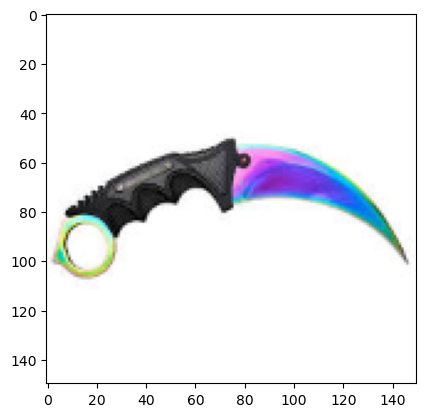

In [6]:
plt.imshow(image_list[166][:,:,::-1])

## create labels

In [7]:
label_list = []
for i in range(163):
    label_list.append(1)
for j in range(485):
    label_list.append(0)

In [8]:
label_list[166]

0

## rajdomize labels and images

In [9]:
combined = list(zip(label_list, image_list))
random.shuffle(combined)
shuffled_labels, shuffled_images = zip(*combined)

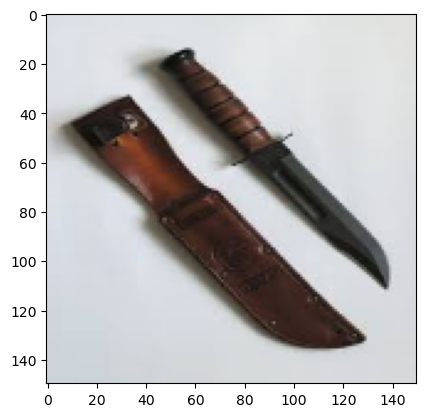

In [10]:
plt.imshow(shuffled_images[300][:,:,::-1])

In [11]:
shuffled_labels[300]

0

In [12]:
image_array = np.array(shuffled_images) 
labels_array = np.array(shuffled_labels)

## split data for test and validation

In [13]:
x_train, x_test, y_train, y_test = train_test_split(image_array, labels_array, test_size=0.2)

In [14]:
x_train1, x_validation, y_train1, y_validation = train_test_split(x_train, y_train, test_size=0.15)

## augmentation data model

In [15]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2)
])

## callback

In [16]:
callback = keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')

## CNN model

In [17]:
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = keras.layers.Rescaling(1./255)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=output)

In [18]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         6,401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 984,897 (3.76 MB)

 Trainable params: 984,897 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [20]:
history = model.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 417ms/step - accuracy: 0.5660 - loss: 0.7740 - val_accuracy: 0.7627 - val_loss: 0.5886
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - accuracy: 0.6599 - loss: 0.6435 - val_accuracy: 0.7627 - val_loss: 0.6379
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.6523 - loss: 0.6287 - val_accuracy: 0.7627 - val_loss: 0.4843
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 392ms/step - accuracy: 0.5975 - loss: 0.7721 - val_accuracy: 0.7627 - val_loss: 0.4513
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 413ms/step - accuracy: 0.6910 - loss: 0.5859 - val_accuracy: 0.7627 - val_loss: 0.6747
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - accuracy: 0.6705 - loss: 0.6473 - val_accuracy: 0.2373 - val_loss: 0.7148
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 0.6110 - loss: 0.6671 - val_accuracy: 0.7627 - val_loss: 0.5264
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.6959 - loss: 0.6135 - val_accuracy: 0.

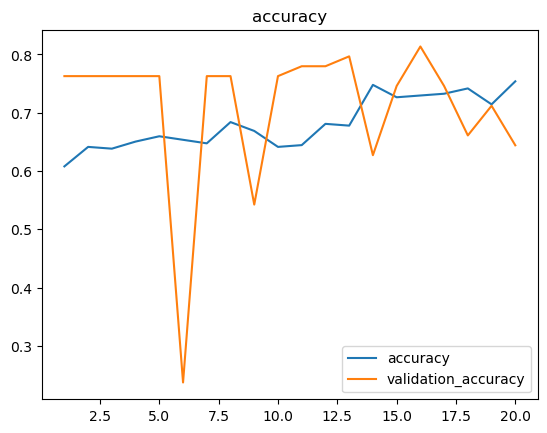

In [21]:
my_dict = history.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

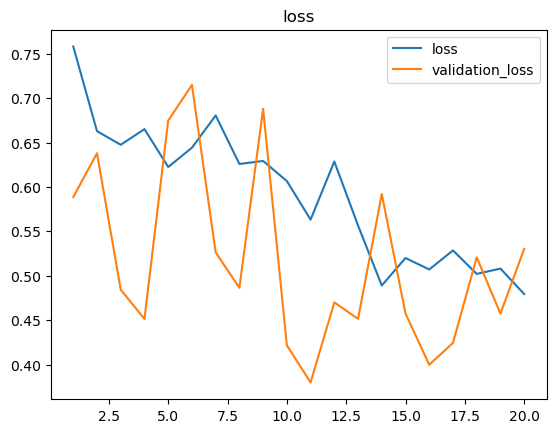

In [22]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

In [23]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7511 - loss: 0.4846 


[0.44435715675354004, 0.7422680258750916]

In [24]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


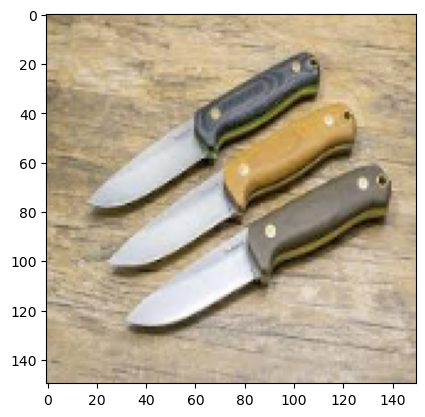

In [25]:
plt.imshow(x_test[90][:,:,::-1])

In [26]:
y_test[90]

0

In [27]:
xception_bace = keras.applications.vgg16.VGG16(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(xception_bace.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model2 = keras.Model(inputs=xception_bace.input, outputs=output)

In [28]:
for layer in xception_bace.layers:
  layer.trainable = False

In [29]:
model2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
history2 = model2.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=20)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5826 - loss: 3.3111 - val_accuracy: 0.6610 - val_loss: 2.3819
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7123 - loss: 1.5322 - val_accuracy: 0.7627 - val_loss: 1.5196
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7838 - loss: 1.0181 - val_accuracy: 0.8475 - val_loss: 1.0969
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8680 - loss: 0.6108 - val_accuracy: 0.8644 - val_loss: 0.8947
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8949 - loss: 0.5158 - val_accuracy: 0.8644 - val_loss: 0.8388
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9174 - loss: 0.3492 - val_accuracy: 0.8814 - val_loss: 0.7566
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 862ms/step - accuracy: 0.9207 - loss: 0.3377 - val_accuracy: 0.8814 - val_loss: 0.7283
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 870ms/step - accuracy: 0.9324 - loss: 0.2966 - val_accuracy: 0.8644 - val_

In [32]:
model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,716,229 (56.14 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,028 (4.02 KB)

In [33]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.7511 - loss: 0.4846


[0.44435715675354004, 0.7422680258750916]

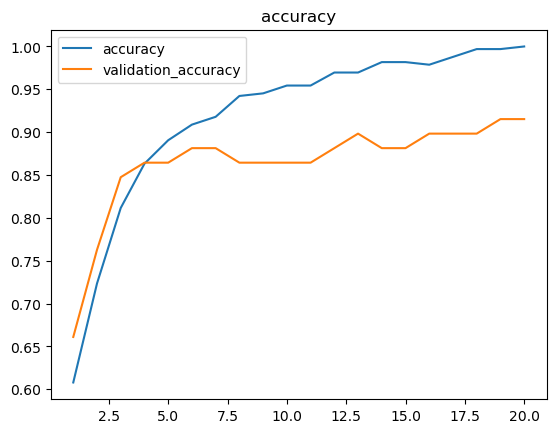

In [34]:
my_dict = history2.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

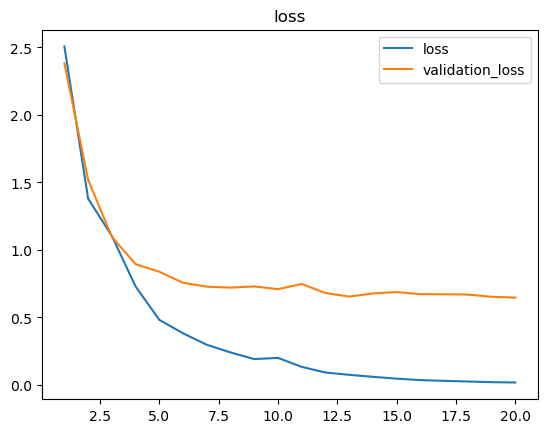

In [35]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

# ResNet50

In [31]:
resnet50 = keras.applications.ResNet50(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(resnet50.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model3 = keras.Model(inputs=resnet50.input, outputs=output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [36]:
for layer in xception_bace.layers:
  layer.trainable = False

In [39]:
model3.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [41]:
history3 = model3.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=5)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.8710 - loss: 0.6280 - val_accuracy: 0.7627 - val_loss: 202.1855
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.8510 - loss: 0.3693 - val_accuracy: 0.7627 - val_loss: 363.8807
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9487 - loss: 0.1936 - val_accuracy: 0.7627 - val_loss: 16.3094
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.9711 - loss: 0.1068 - val_accuracy: 0.7627 - val_loss: 25.8048
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.9665 - loss: 0.1621 - val_accuracy: 0.7627 - val_loss: 15.1388


In [42]:
model3.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 70,663,045 (269.56 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,073,284 (179.57 MB)

In [43]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7511 - loss: 0.4846 


[0.44435715675354004, 0.7422680258750916]

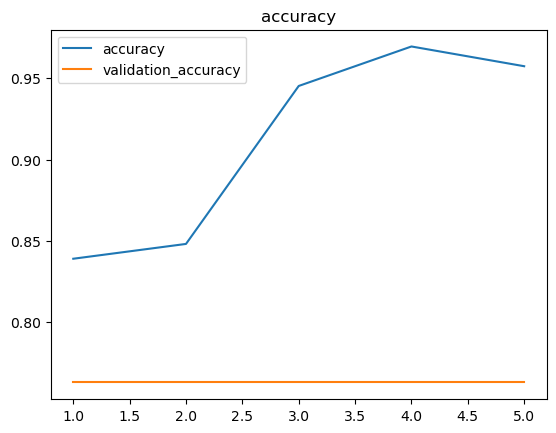

In [44]:
my_dict = history3.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

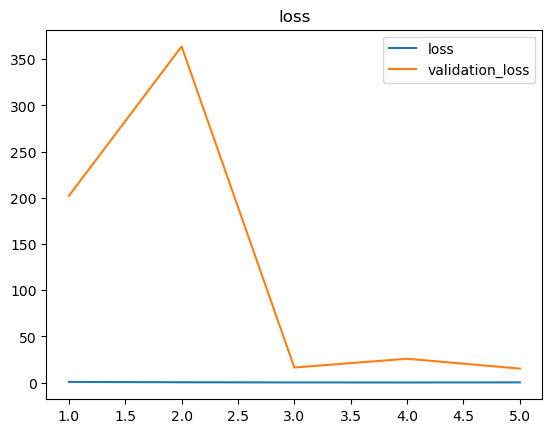

In [45]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

# MobileNetV2

In [46]:
mobile_net = keras.applications.MobileNetV2(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(mobile_net.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model4 = keras.Model(inputs=mobile_net.input, outputs=output)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [47]:
for layer in xception_bace.layers:
  layer.trainable = False

In [48]:
model4.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [49]:
history4 = model4.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=5)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7492 - loss: 0.4755 - val_accuracy: 0.2542 - val_loss: 19.2523
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9161 - loss: 0.2830 - val_accuracy: 0.2542 - val_loss: 20.8827
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9440 - loss: 0.1553 - val_accuracy: 0.3051 - val_loss: 19.0491
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9843 - loss: 0.0620 - val_accuracy: 0.4068 - val_loss: 13.5905
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9936 - loss: 0.0223 - val_accuracy: 0.2542 - val_loss: 31.0269


In [50]:
model4.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, None,      │        864 │ input_layer_4[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, None,      │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, None,      │          0 │ bn_Conv1[0][0]    │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │          0 │ expanded_conv_de… │
│ (ReLU)              │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │        512 │ expanded_conv_de… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, None,      │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, None,      │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, None,      │          0 │ block_1_expand_B… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, None,      │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, None,      │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │          0 │ block_1_depthwis… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, None,      │      2,304 │ block_1_depthwis

 Total params: 6,709,573 (25.59 MB)

 Trainable params: 2,225,153 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 4,450,308 (16.98 MB)

In [51]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.7511 - loss: 0.4846 


[0.44435715675354004, 0.7422680258750916]

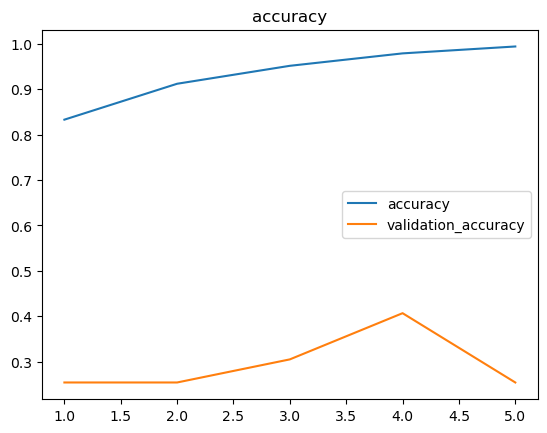

In [52]:
my_dict = history4.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

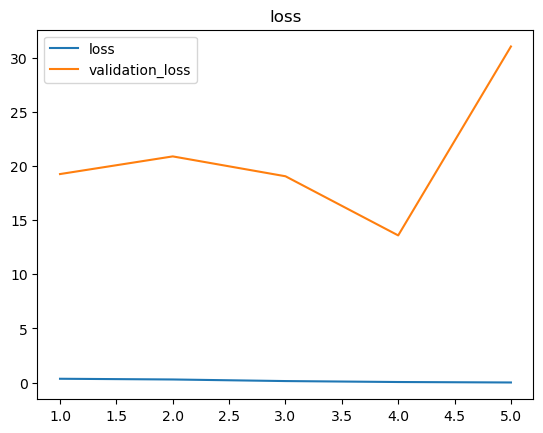

In [53]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

# InceptionNet

In [56]:
inceptionnet = keras.applications.InceptionV3(include_top=False)
x = keras.layers.GlobalAveragePooling2D()(inceptionnet.output)
output = keras.layers.Dense(1, activation='sigmoid')(x)
model5 = keras.Model(inputs=inceptionnet.input, outputs=output)

In [57]:
for layer in xception_bace.layers:
  layer.trainable = False

In [58]:
model5.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [59]:
history5 = model5.fit(x_train1, y_train1, validation_data=(x_validation, y_validation), epochs=5)

Epoch 1/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8149 - loss: 0.4953 - val_accuracy: 0.7627 - val_loss: 83.8541
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9111 - loss: 0.2163 - val_accuracy: 0.7627 - val_loss: 18497.4492
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9532 - loss: 0.1265 - val_accuracy: 0.7627 - val_loss: 3465.6721
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9968 - loss: 0.0256 - val_accuracy: 0.7458 - val_loss: 76.7658
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9929 - loss: 0.0213 - val_accuracy: 0.7797 - val_loss: 6.2662


In [60]:
model5.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_99 (Conv2D)  │ (None, None,      │        864 │ input_layer_6[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_99[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_100 (Conv2D) │ (None, None,      │      9,216 │ activation_94[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_100[0][0]  │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_101 (Conv2D) │ (None, None,      │     18,432 │ activation_95[0]… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_101[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, None,      │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_102 (Conv2D) │ (None, None,      │      5,120 │ max_pooling2d_8[… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_102[0][0]  │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_103 (Conv2D) │ (None, None,      │    138,240 │ activation_97[0]… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_103[0][0]  │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, None,      │          0 │ batch_normalizat

 Total params: 65,345,637 (249.27 MB)

 Trainable params: 21,770,401 (83.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 43,540,804 (166.09 MB)

In [61]:
model5.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.6825 - loss: 9.9181 


[8.26693058013916, 0.6907216310501099]

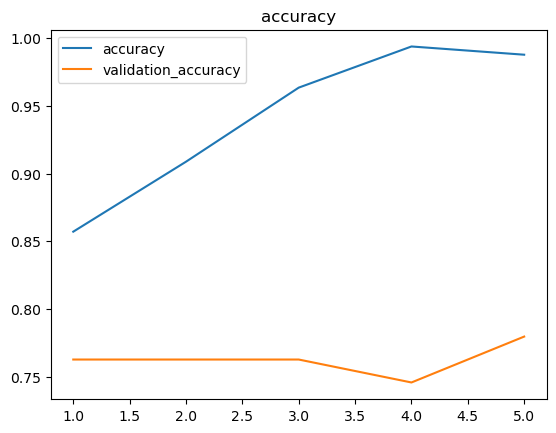

In [62]:
my_dict = history5.history
accuracy = my_dict['accuracy']
val_accuracy = my_dict['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='validation_accuracy')
plt.title('accuracy')
plt.legend()

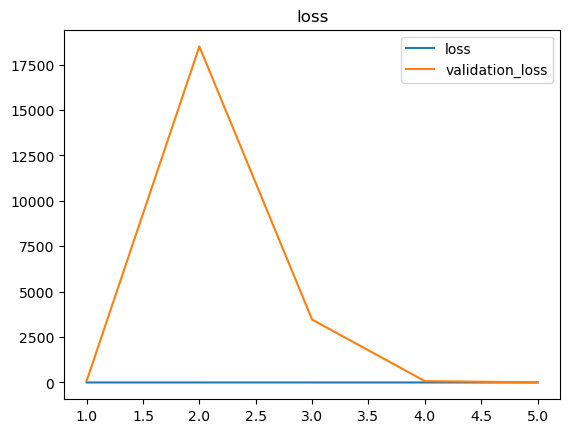

In [63]:
loss = my_dict['loss']
val_loss = my_dict['val_loss']
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='validation_loss')
plt.title('loss')
plt.legend()

# Conclusion:
## MobileNetV2:
MobileNets are a family of efficient convolutional neural networks designed for mobile and edge devices.
MobileNetV2 has 53 layers, including the input layer and the output layer. It is a lightweight CNN architecture that is designed for mobile and embedded vision applications. It uses depthwise separable convolutions to reduce the number of parameters and computations required by the model.
## Xception:
Xception, introduced by Google in 2017, is a deep convolutional neural network known for its novel feature learning. It uses depth-separable convolutions, which decompose standard convolutions into depth and pointwise convolutions.
Xception has 36 layers, including the input layer and the output layer. It is a CNN architecture that is based on the Inception architecture, but replaces the standard Inception modules with depthwise separable convolutions. This allows the model to achieve better performance with fewer parameters.
## GoogLeNet (InceptionV1):
GoogLeNet has 22 layers, including the input layer and the output layer. It is a CNN architecture that was introduced in 2014 and is composed of multiple "inception modules" that apply multiple convolutional filters of different sizes to the input, allowing the model to learn features at multiple scales.
## VGG16: 
VGGNet was born out of the need to reduce the # of parameters in the CONV layers and improve on training time.
VGG16 has 16 layers, including the input layer and the output layer. It is a CNN architecture that was introduced in 2014 and is composed of multiple convolutional layers with small (3x3) filters. It is a deep and powerful model that has been widely used for image classification tasks.
## ResNet50: 
 provided a novel way to add more convolutional layers to a CNN, without running into the vanishing gradient problem, using the concept of shortcut connections.
ResNet50 has 50 layers, including the input layer and the output layer. It is a CNN architecture that was introduced in 2015 and is composed of multiple residual blocks that allow the model to learn deeper representations by adding "shortcut connections" that bypass some of the layers. ResNet50 is a powerful model that has been widely used for image classification tasks.